In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import arviz as az
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pystan
%load_ext jupyterstan

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
STAN_MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "stan_models")
STAN_DATA_PATH = os.path.join(PROJECT_ROOT_DIR,'data')

from stan_utils import *

## predict 1

In [2]:
prediction_model_knowpowerlocation = StanModel_load('prediction_model_knowpowerlocation')
stan_data_pred_20groups = StanData_load('stan_data_pred_20groups')

Using cached StanModel:prediction_model_knowpowerlocation
Using cached StanDATA: stan_data_pred_20groups


In [3]:
predict_data = prediction_model_knowpowerlocation.sampling(stan_data_pred_20groups, iter=1,
                                      chains=1, 
                                      algorithm="Fixed_param")

In [5]:
predict = predict_data.extract()

In [8]:
a = predict['pred_Y'].reshape(100, 20000)

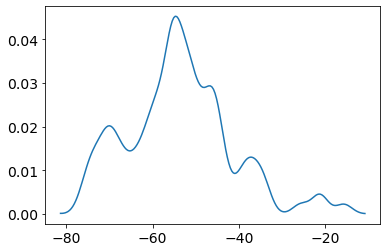

In [18]:
az.plot_dist(a[2:,])

## predict 2

In [21]:
prediction_model_knowpowerlocation = StanModel_load('prediction_model_knowpowerlocation')
stan_data_pred_1000para = StanData_load('stan_data_pred_1000para')

Using cached StanModel:prediction_model_knowpowerlocation
Using cached StanDATA: stan_data_pred_1000para


In [22]:
predict_data = prediction_model_knowpowerlocation.sampling(stan_data_pred_1000para, iter=1,
                                      chains=1, 
                                      algorithm="Fixed_param")

In [23]:
predict2 = predict_data.extract()

In [24]:
b = predict['pred_Y'].reshape(100, 20000)

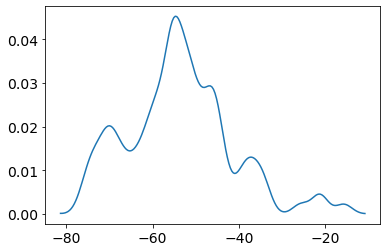

In [25]:
az.plot_dist(b[2:,])